In [1]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("reviews.csv",parse_dates=['Timestamp'])
df.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating average/count by day

In [3]:
df['Day'] = df['Timestamp'].dt.date
day_average = df.groupby(['Day']).mean()
day_average.head()


,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


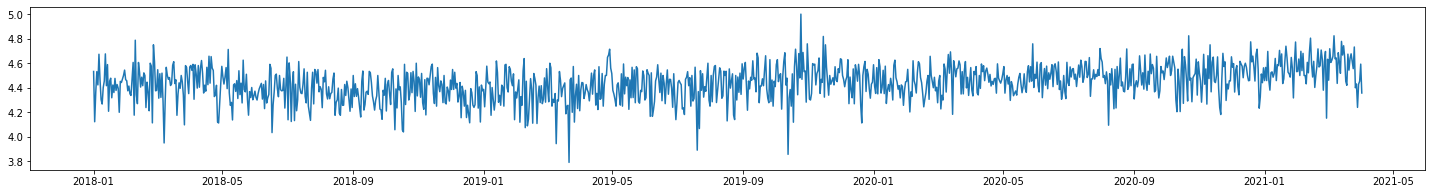

In [4]:
plt.figure(figsize=(25,3))
plt.plot(day_average.index,day_average.Rating)

In [5]:
df['Day'] = df['Timestamp'].dt.date
day_average = df.groupby(['Day']).count()
day_average.head()

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


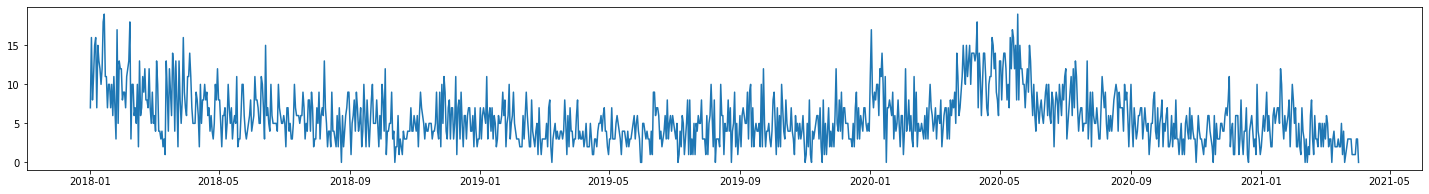

In [6]:
plt.figure(figsize=(25,3))
plt.plot(day_average.index,day_average.Comment)

### Rating average by week (Down Sampling by Week)

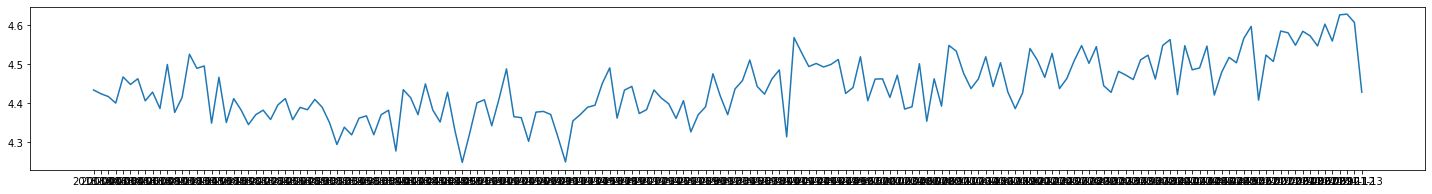

In [7]:
#Down Sampling Data by Week

df['Week'] = df['Timestamp'].dt.strftime('%Y-%U')

week_average = df.groupby(['Week']).mean()

plt.figure(figsize=(25,3))
plt.plot(week_average.index,week_average.Rating)


### Down Sampling Data by Month

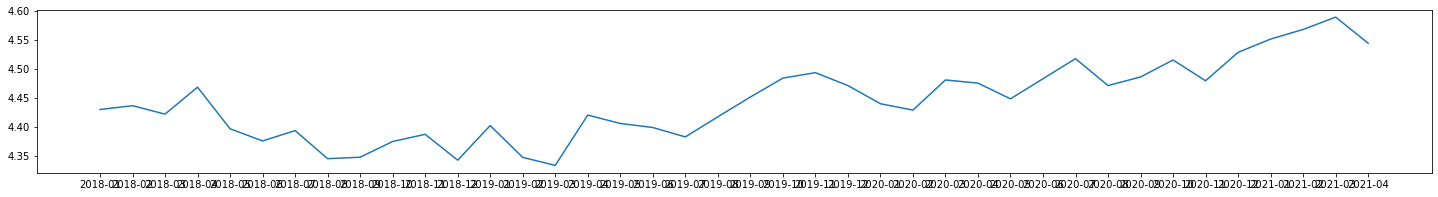

In [8]:
#Down Sampling Data by Month

df['Month'] = df['Timestamp'].dt. strftime('%Y-%m')

month_average = df.groupby(['Month']).mean()
plt.figure(figsize=(25,3))
plt.plot(month_average.index,month_average.Rating)

### Average Rating by month by Course

In [9]:
df['Month'] = df['Timestamp'].dt. strftime('%Y-%m')
month_course_average = df.groupby(['Month','Course Name']).mean().unstack()
for i in month_course_average.Rating:
    print(i)

100 Python Exercises I: Evaluate and Improve Your Skills
100 Python Exercises II: Evaluate and Improve Your Skills
Data Processing with Python
Interactive Data Visualization with Python and Bokeh
Learn GIS in One Hour
Python for Beginners with Examples
The Complete Python Course: Build 10 Professional OOP Apps
The Python Mega Course: Build 10 Real World Applications


### What day of the week are People Happiest

In [20]:
df['Weekday'] = df['Timestamp'].dt.strftime('%A')
df['Daynumber'] = df['Timestamp'].dt.strftime('%w')

weekday_average = df.groupby(['Weekday','Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')
weekday_average.index

MultiIndex([(   'Sunday', '0'),
            (   'Monday', '1'),
            (  'Tuesday', '2'),
            ('Wednesday', '3'),
            ( 'Thursday', '4'),
            (   'Friday', '5'),
            ( 'Saturday', '6')],
           names=['Weekday', 'Daynumber'])

In [11]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : li

### Number of Ratings by Course

In [31]:
share = df.groupby(['Course Name'])['Rating'].count()
share.index

Index(['100 Python Exercises I: Evaluate and Improve Your Skills',
       '100 Python Exercises II: Evaluate and Improve Your Skills',
       'Data Processing with Python',
       'Interactive Data Visualization with Python and Bokeh',
       'Learn GIS in One Hour', 'Python for Beginners with Examples',
       'The Complete Python Course: Build 10 Professional OOP Apps',
       'The Python Mega Course: Build 10 Real World Applications'],
      dtype='object', name='Course Name')

([<matplotlib.patches.Wedge at 0x7fc210a14490>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609823, 'Learn GIS in One Hour'),
  Text(0.6871674297354248, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

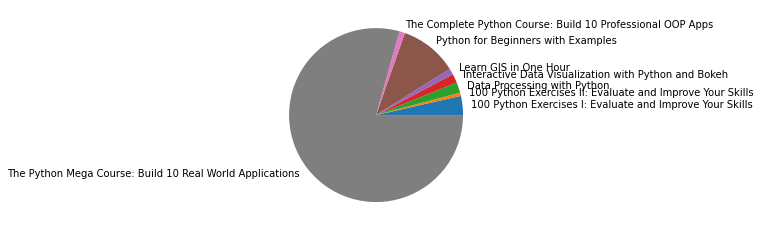

In [13]:
plt.pie(share,labels=share.index)